In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import norm
import scipy.stats

# Exercice 7: Probabilité d'obtenir un nombre de faces compris entre 3 et 6  quand on jette 10 fois une pièce 
- en utilisant (a) une **loi binomiale**, (b) une **approximation normale de la loi binomiale**.

In [ ]:
# (a)
n = 10
p = 0.5

df = pd.DataFrame()
df['NB_FACES'] = range(0, n + 1)
df['PROBA'] = scipy.stats.binom.pmf(df['NB_FACES'], n, p)

print(f"Entre 3 et 6 faces :{df['PROBA'][df['NB_FACES'].between(3,6)].sum()}")
df

Entre 3 et 6 faces :0.7734374999999998
Entre 3 et 6 faces :0.7734374999999998


,NB_FACES,PROBA
0,0,0.000977
1,1,0.009766
2,2,0.043945
3,3,0.117187
4,4,0.205078
5,5,0.246094
6,6,0.205078
7,7,0.117187
8,8,0.043945
9,9,0.009766


Ok pour approximation gaussienne car p & q sont assez éloignés de 0 (0.5 ; 0.5)

Entre 3 et 6 faces :0.6335037662011967


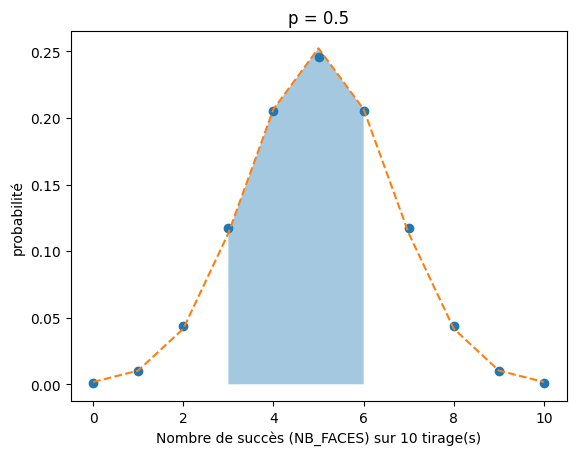

,NB_FACES,PROBA,NORM_PROBA
0,0,0.000977,0.001700
1,1,0.009766,0.010285
2,2,0.043945,0.041707
3,3,0.117187,0.113372
4,4,0.205078,0.206577
5,5,0.246094,0.252313
6,6,0.205078,0.206577
7,7,0.117187,0.113372
8,8,0.043945,0.041707
9,9,0.009766,0.010285


In [29]:
# (b)

df['NORM_PROBA'] = norm.pdf(df['NB_FACES'], loc=n*p, scale=math.sqrt(n*p*(1-p)))

print(f"Entre 3 et 6 faces :{norm.cdf(6, loc=n*p, scale=math.sqrt(n*p*(1-p))) - norm.cdf(3, loc=n*p, scale=math.sqrt(n*p*(1-p)))}")

plt.plot(df['NB_FACES'],df['PROBA'],'o')
plt.plot(df['NB_FACES'],df['NORM_PROBA'], '--')
select_df = df[(df['NB_FACES']>=3)&(df['NB_FACES']<=6)]
plt.fill_between(select_df['NB_FACES'], select_df['NORM_PROBA'], alpha=0.4)

plt.xlabel('Nombre de succès (NB_FACES) sur {} tirage(s)'.format(n))
plt.ylabel('probabilité')
plt.title('p = {}'.format(p))
plt.show()

df